# Guided Project: Visualizing Earnings Based On College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time`- Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?
  - Using scatter plots
- How many majors are predominantly male? Predominantly female?
  - Using histograms
- Which category of majors have the most students?
  - Using bar plots

## Importing libaries & read the dataset

- Let's setup the environment by importing the libraries we need and running the necessary Jupyter magic so that plots are displayed inline:

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline 

- Read the dataset into a DataFrame and start exploring the data:

In [3]:
recent_grads = pd.read_csv('recent-grads.csv') 
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
recent_grads.describe()

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


 - Drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors. 

In [4]:
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [5]:
raw_data_count = 173 
recent_grads = recent_grads.dropna() 
cleaned_data_count = 172

## Pandas, Scatter Plots

Generate scatter plots in separate jupyter notebook cells to explore the following relations:

(0, 3000)

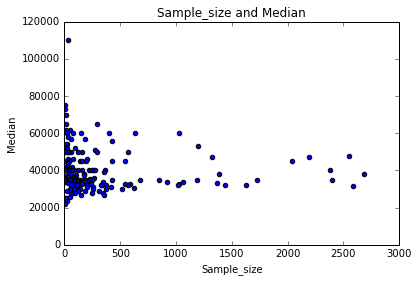

In [6]:
# Sample_size and Median 

ax1 = recent_grads.plot(x='Sample_size', y='Median', kind='scatter') 
ax1.set_title('Sample_size and Median')
ax1.set_xlim(0,3000)

(0, 3000)

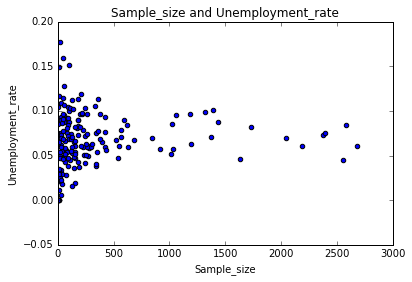

In [7]:
# Sample_size and Unemployment_rate

ax2 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter') 
ax2.set_title('Sample_size and Unemployment_rate')
ax2.set_xlim(0,3000)

(20000, 80000)

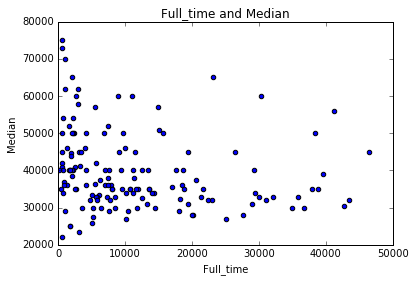

In [8]:
# Full_time and Median

ax3 = recent_grads.plot(x='Full_time', y='Median', kind='scatter') 
ax3.set_title('Full_time and Median')
ax3.set_xlim(0,50000)
ax3.set_ylim(20000,80000)

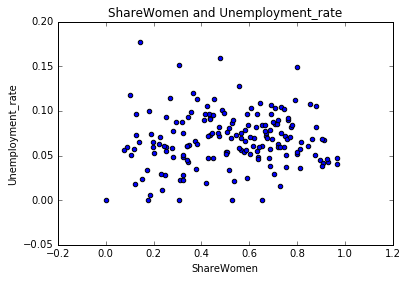

In [9]:
# ShareWomen and Unemployment_rate 

ax4 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter') 
ax4.set_title('ShareWomen and Unemployment_rate')

(0, 150000)

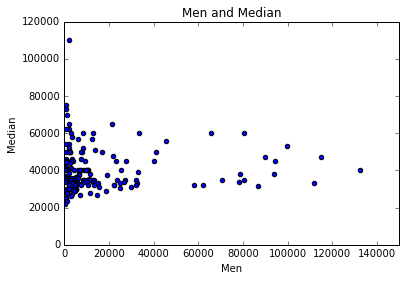

In [10]:
# Men and Median 

ax5 = recent_grads.plot(x='Men', y='Median', kind='scatter') 
ax5.set_title('Men and Median')
ax5.set_xlim(0,150000)

(0, 150000)

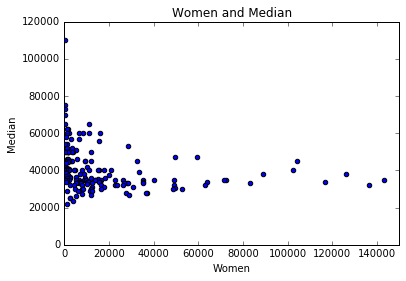

In [11]:
# Women and Median 

ax6 = recent_grads.plot(x='Women', y='Median', kind='scatter') 
ax6.set_title('Women and Median')
ax6.set_xlim(0,150000)

### Use the plots to explore the following questions:
 - Do students in more popular majors make more money?

(20000, 80000)

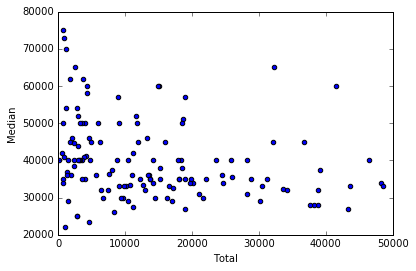

In [12]:
# Total and Median

ax7 = recent_grads.plot(x='Total', y='Median', kind='scatter') 
ax7.set_xlim(0,50000)
ax7.set_ylim(20000,80000)

The scatter plot above represents the correlation of the `Median` (median salary of full-time, year-round workers) with the `Total` (total number of people with major). We can observe that as the `Median` incrases, the `Total` actually goes down. 

Therefore, according to our scatter plot students in more popular majors do not actually make more money.

- Do students that majored in subjects that were majority female make more money? 

(20000, 80000)

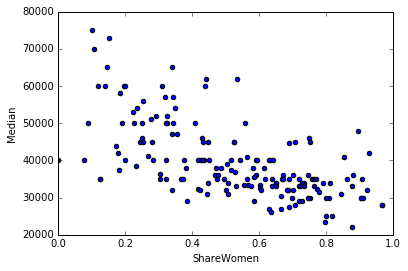

In [13]:
# ShareWomen and Median 

ax8 = recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')
ax8.set_xlim(0,1)
ax8.set_ylim(20000,80000)

We can observe the negative correlation between the `Median` (median salary of full-time, year-round workers) and the `ShareWomen` (share of women of total). We can observe that as the `Median` goes up, the `ShareWomen` goes down. 

Students that majored in subjects that were majority female make less money.

 - Is there any link between the number of full-time employees and median salary? 
 
The `ax3` scatter plot represents the correlation between the `Median` (median salary of full-time, year-round workers) and the `Full_time`(number employed 35 hours or more). We can see that there is a slight negative correlation: as the `Median` goes up, the `Full_time` goes down, but there are some outliers as well. So the link between the two is medium strong. 

## Pandas, Histograms 

Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:

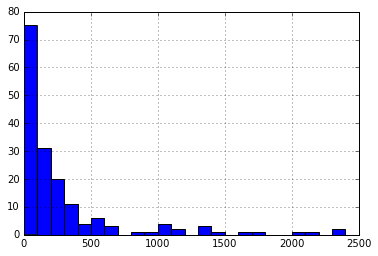

In [14]:
# Sample_size 

recent_grads['Sample_size'].hist(bins=25, range=(0,2500))

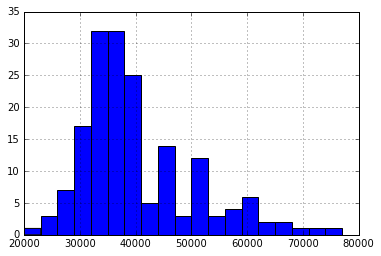

In [15]:
# Median 

recent_grads['Median'].hist(bins=20, range=(20000,80000))

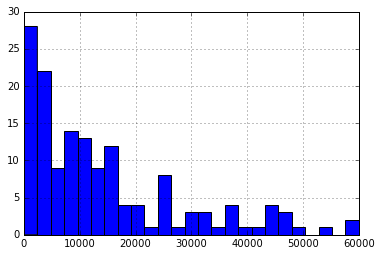

In [16]:
# Employed 

recent_grads['Employed'].hist(bins=25, range=(0,60000))

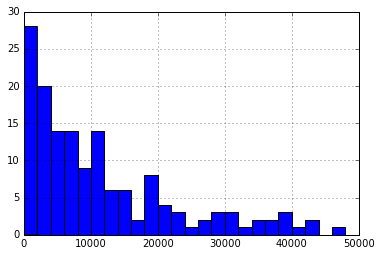

In [17]:
# Full_time 

recent_grads['Full_time'].hist(bins=25, range=(0,50000))

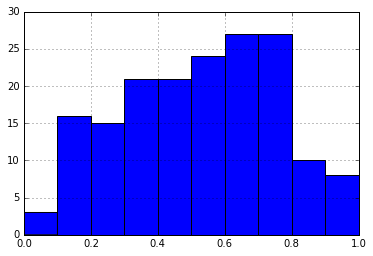

In [18]:
# ShareWomen 

recent_grads['ShareWomen'].hist(bins=10, range=(0,1))

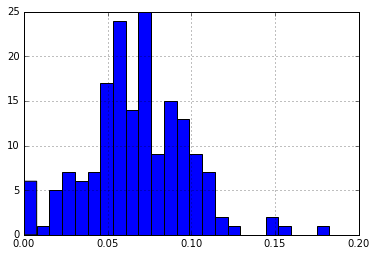

In [19]:
# Unemployment_rate 

recent_grads['Unemployment_rate'].hist(bins=25, range=(0,0.19))

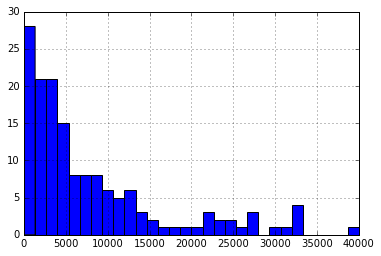

In [20]:
# Men 

recent_grads['Men'].hist(bins=30, range=(0,40000))

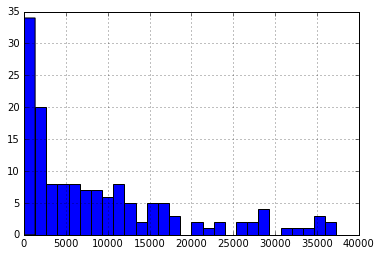

In [21]:
# Women 

recent_grads['Women'].hist(bins=30, range=(0,40000))

### Use the plots to explore the following questions:

- What percent of majors are predominantly male? Predominantly female?

Looking at the `ShareWomen` histogram that shows the distribution over the share of women, we can see that highest concentration is in the range between 60% and 80%. Meaning, approx. 80% of majors are predominantly female, and the rest is predominantly male. 

- What's the most common median salary range? 

If we take a look at the `Median` histogram we can see that the most common median salary range is between 30,000 and 40,000. 

## Pandas, Scatter Matrix Plot


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc114c8cf28>,
      dtype=object)

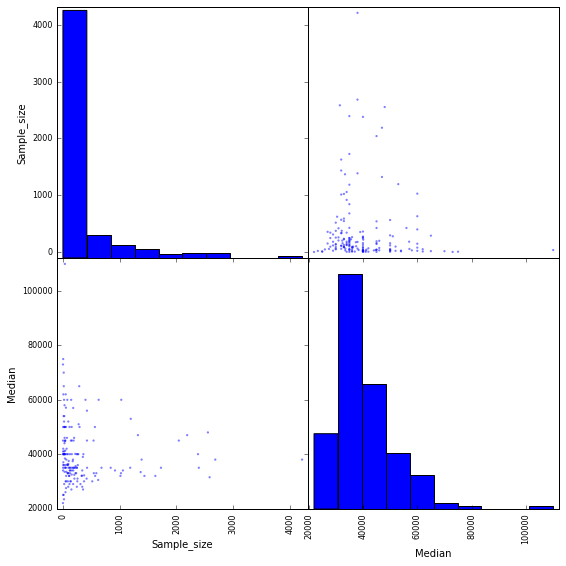

In [22]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(9,9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc114ac30f0>,
      dtype=object)

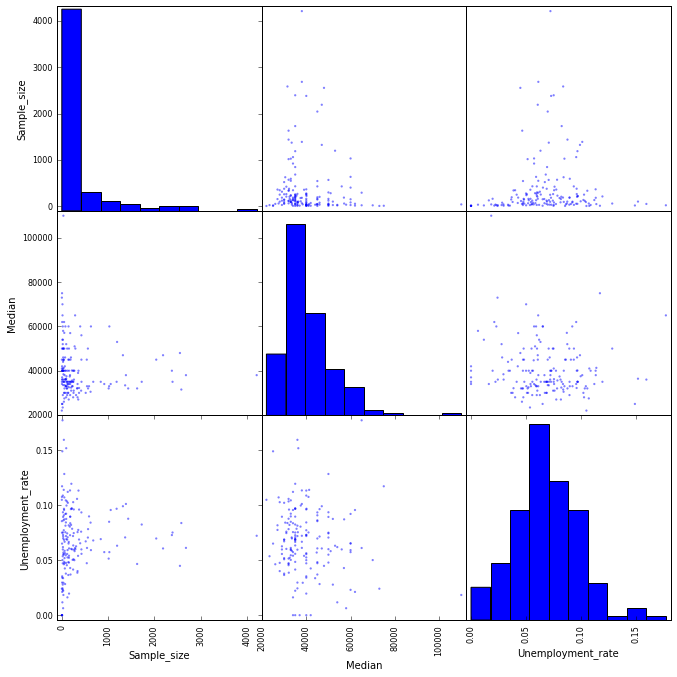

In [23]:
scatter_matrix(recent_grads[['Sample_size','Median', 'Unemployment_rate']], figsize=(11,11))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1147a9b38>,
      dtype=object)

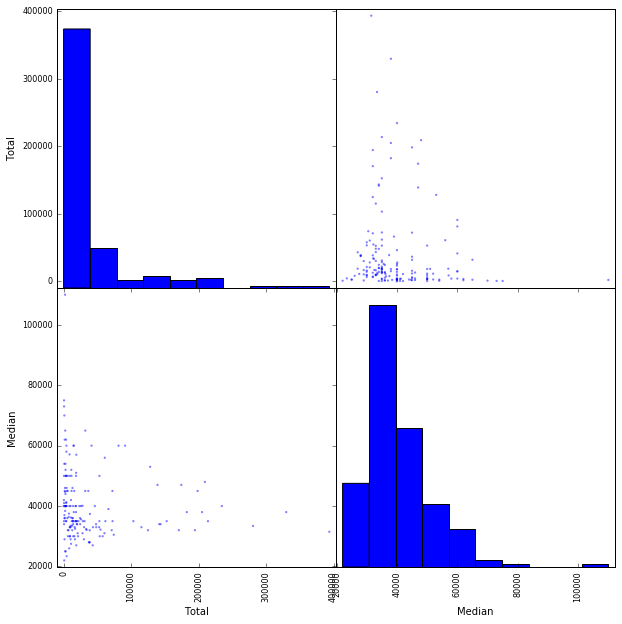

In [24]:
scatter_matrix(recent_grads[['Total','Median']], figsize=(10,10))

The scatter matrix above shows us the negative correlation between the `Median` and `Total`, as one goes down, the other goes up. So students with popular majors do not make more money. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc11470acf8>,
      dtype=object)

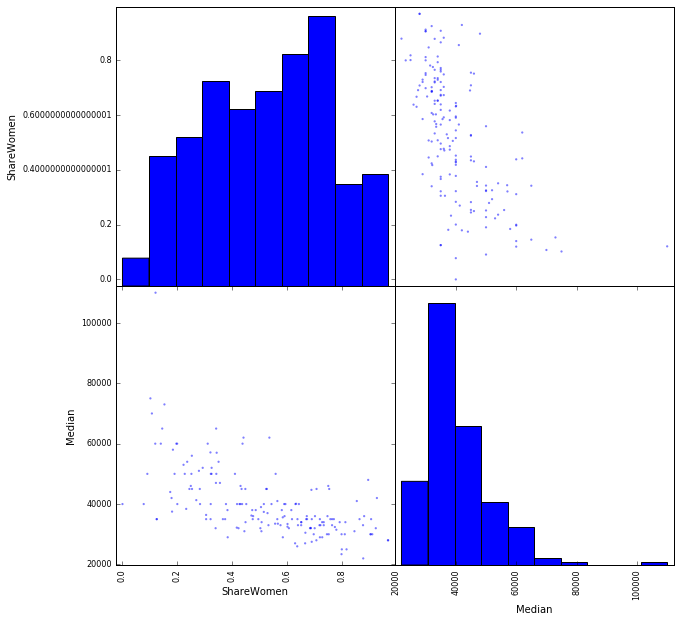

In [25]:
scatter_matrix(recent_grads[['ShareWomen','Median']], figsize=(10,10))

The scatter matrix above shows us the negative correlation between the `Median` and `ShareWomen`, as one goes down, the other goes up. So students that majored in subjects that were majority female do not make more money. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc112d6a9b0>,
      dtype=object)

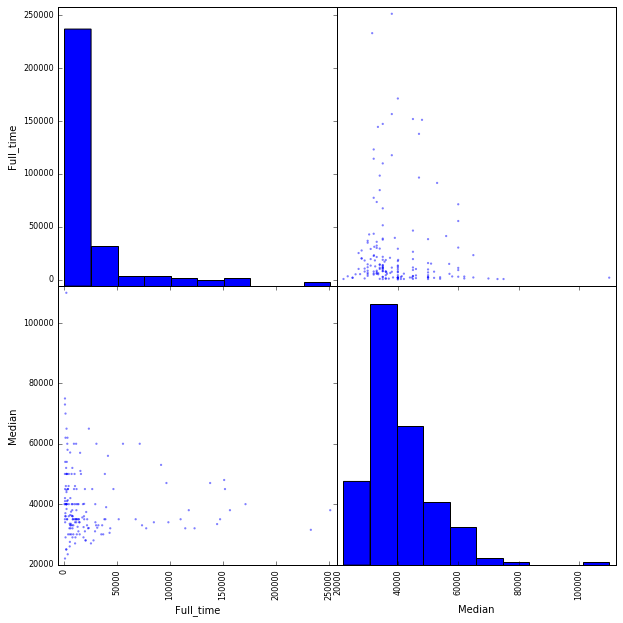

In [26]:
scatter_matrix(recent_grads[['Full_time','Median']], figsize=(10,10))

There is a slight negative correlation: as the Median goes up, the Full_time goes down, but there are some outliers as well. 

## Pandas, Bar Plots 


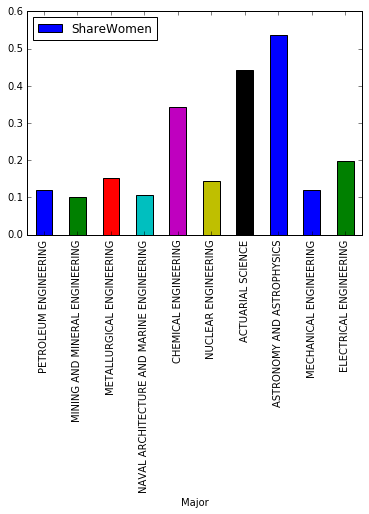

In [27]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')

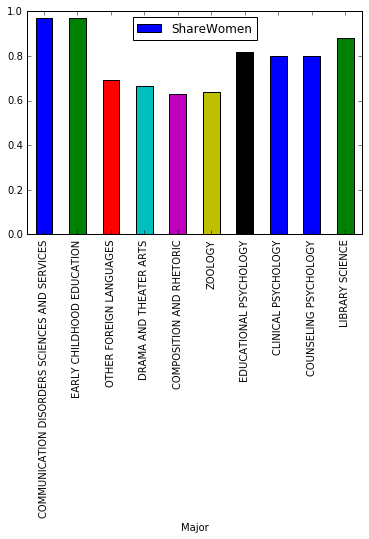

In [28]:
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

The percentages of women in the first ten rows that are mainly engineering category majors were relatively low with the highest value at 0.54, compared to percentages of women in the last ten rows that represent social sciences and arts majors are nearly twice as high, ranging from 0.6 to 1. 

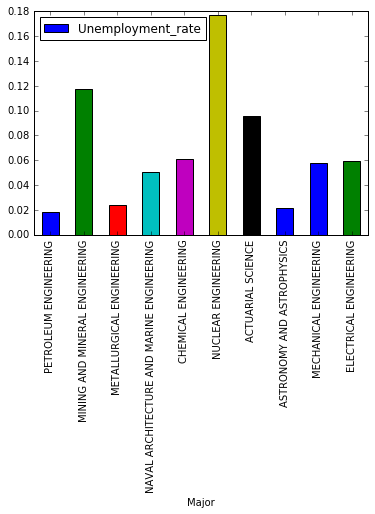

In [32]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')

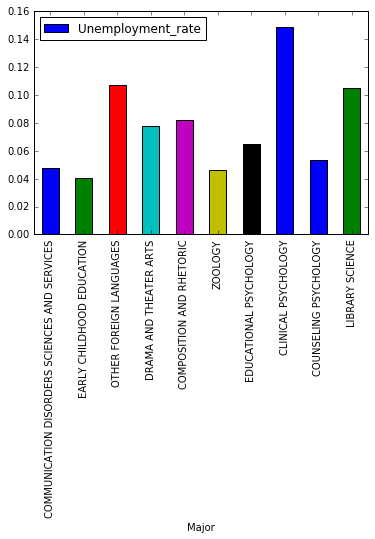

In [33]:
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

The bar plots above represent the `Unemployment_rate` in the last 10 and first 10 majors in the dataset. The first 10 majors are associated with engineering and physics, whereas the last 10 are the majors of social sciences, education and arts. 
- There is a clear demand for `Petroleum Engineering`, `Metallurgical Engineering`, and `Astronomy and Astrophysics` jobs since the unemployment rate is the lowest among other majors - up to 3%. 
- `Nuclear Engineering` and `Clinical Psychology` majors are hired the least because the unemployment rates are the highest among other majors - up to 18%. 

## Next steps 


*Use a grouped bar plot to compare the number of men with the number of women in each category of majors:*

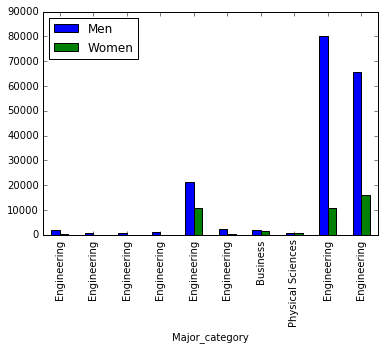

In [49]:
df = pd.DataFrame(recent_grads,columns=["Major_category","Men","Women"])
df.head(10).plot.bar(x = 'Major_category')

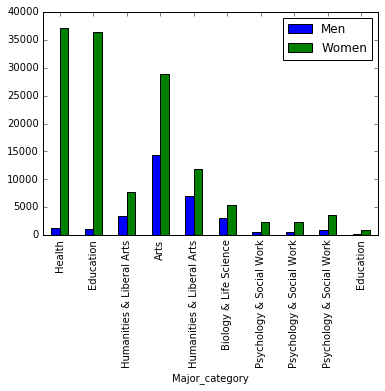

In [50]:
df.tail(10).plot.bar(x = 'Major_category')

We see the same pattern as before: male students are dominating the `Engineering` major category, whereas female students are prevailing in major categories like `Health, Education, Arts`. 

*Use a box plot to explore the distributions of median salaries and unemployment rate:*

{'boxes': [<matplotlib.lines.Line2D at 0x7fc1124369b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc1123c0eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc1123ca748>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc1123c5828>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc112436b38>,
  <matplotlib.lines.Line2D at 0x7fc1123d0f98>]}

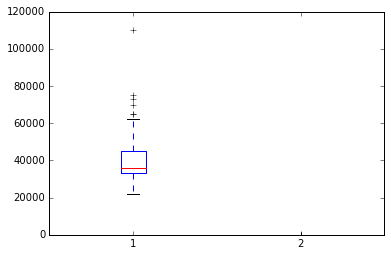

In [35]:
fig, ax = plt.subplots()
num_cols = ['Median', 'Unemployment_rate']
ax.boxplot(recent_grads[num_cols].values)

The box plot above represents the distribution of median salaries and unemployment rate. We can see that values are not dispersed equally.
- The vast majority of values are concentrated in the 4th quartile (approx. 42,000-61,000). 
- We can observe outliers above 4th quartile 
- The 2nd quartile covers the least values 


*Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project:*

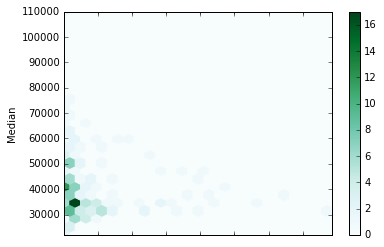

In [51]:
# Total Vs Median
recent_grads.plot.hexbin(x='Total', y='Median', gridsize=25)

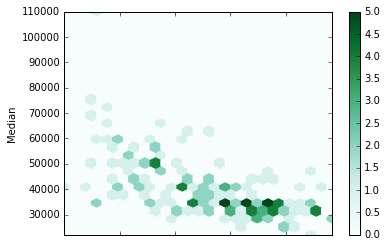

In [52]:
# ShareWomen Vs Median
recent_grads.plot.hexbin(x='ShareWomen', y='Median', gridsize=25)

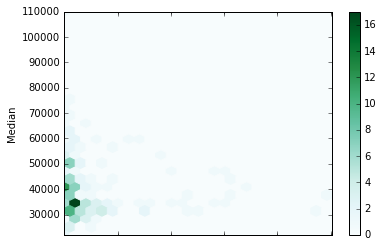

In [53]:
# Full_time Vs Median
recent_grads.plot.hexbin(x='Full_time', y='Median', gridsize=25)

## Conclusion

We visualized the salaries of graduates based on college majors with the help of scatter plos, bar plos, histograms, and scatter matrix plots in pandas. 
Different visualization methods led us to similar conclusions: 
- Students with popular majors do *not* actually make more money. Popular majors are defined as majors with the highest total number of students. 
- Male students are dominating the technical, engineering and physics major categories. Women, on the other hand, are prevailing in the social sciences, education, and health majors. 
- Students with majors dominated by women make less money. 